In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sales_df = pd.read_csv('./desktop/advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


### Creating features
In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. 



In [5]:
X = sales_df['radio'].values
y = sales_df['sales'].values
X.shape, y.shape

((4546,), (4546,))

In [7]:
X = X.reshape(-1,1)
X.shape, y.shape
# feature must be two dimensional NumPy array

((4546, 1), (4546,))

### Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.
- import LinearRegression.
- Instantiate a linear regression model.
- Predict sales values using X, storing as predictions.

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)
print(predictions[0:5])

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.
- Import matplotlib.pyplot as plt.
- Create a scatter plot visualizing y against X, with observations in blue.
- Draw a red line plot displaying the predictions against X.
- Display the plot.

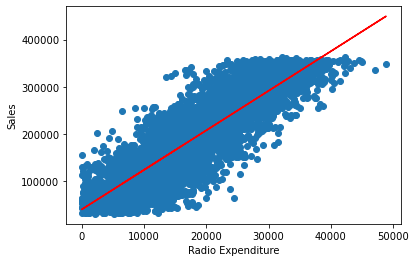

In [12]:
plt.scatter(X,y)
plt.plot(X, predictions, color ='red')
plt.xlabel('Radio Expenditure')
plt.ylabel('Sales')
plt.show()

### Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. You will then use this model to predict sales based on the values of the test features.
- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create y_pred, making predictions for sales using the test features.

In [26]:
from sklearn.model_selection import train_test_split
X = sales_df.drop(['influencer','sales'], axis = 1).values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Predictions:{}, Actual Values:{}'.format(y_pred[0:5], y_test[0:5]))

Predictions:[ 53176.66154234  70996.19873235 267032.64132081 195731.02438566
 274005.60025851], Actual Values:[ 55261.28  67574.9  272250.11 195102.18 273960.38]


### Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.
Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.
The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.
- Import mean_squared_error.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using y_test and y_pred.
- Print r_squared and rmse.

In [27]:
from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_pred, y_test, squared = False)

print('R suqared {}, RMSE {}'.format(r_squared, rmse))

R suqared 0.9990152104759368, RMSE 2944.4331996000988


### Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

- Import KFold and cross_val_score.
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on X and y, passing kf to cv.
- Print the cv_scores.

In [33]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 5)
reg = LinearRegression()

cv_scores = cross_val_score(reg, X, y, cv=kf)

print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [34]:
X

array([[16000.  ,  6566.23,  2907.98],
       [13000.  ,  9237.76,  2409.57],
       [41000.  , 15886.45,  2913.41],
       ...,
       [44000.  , 19800.07,  5096.19],
       [71000.  , 17534.64,  1940.87],
       [42000.  , 15966.69,  5046.55]])

In [35]:
y

array([ 54732.76,  46677.9 , 150177.83, ..., 163631.46, 253610.41,
       148202.41])

### Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise

- Calculate and print the mean of the results.
- Calculate and print the standard deviation of cv_results.
- Display the 95% confidence interval for your results using np.quantile().

In [41]:
print(np.mean(cv_scores))
print(np.std(cv_scores))
print(np.quantile(cv_scores, [0.125, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99892221 0.99908583]


### Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their 
R
2
 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.
- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the R2 score for each iteration of ridge.

In [45]:
from sklearn.linear_model import Ridge
alpha = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

ridge_scores = []
for alpha in alpha:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


### Lasso regression for feature importance
In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.
- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.3.
- Fit the model to the data.
- Compute the model's coefficients, storing as lasso_coef.

In [53]:
sales_columns = ['tv', 'radio', 'social_media']

In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.3)
lasso.fit(X, y)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

[ 3.56256962 -0.00397035  0.00496385]


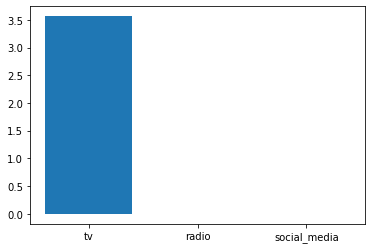

In [54]:
plt.bar(sales_columns, lasso_coef)
plt.show()